In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Import Dataset

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', dtype={"desc": object})
# df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df[(df['loan_status'] == "Current")]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-05,1.0,NaN,NaN,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0,Jan-16,170.08,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,1065420,1299514,10000,10000,9975.0,60 months,15.96,242.97,C,C5,US Legal Support,2 years,RENT,29120.0,Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Brown Eyes Loan,330xx,FL,22.83,0.0,Feb-97,1.0,68.0,NaN,11.0,0.0,16158,63.6,31.0,f,2695.31,2688.53,11622.36,11593.40,7304.67,4317.69,0.0,0.0,0.0,Jan-16,242.97,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,1069346,1304237,12500,12500,12475.0,60 months,12.69,282.44,B,B5,United States Infrastructure Corporation,1 year,RENT,27000.0,Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/20/11 > The purpose of ...,debt_consolidation,Credit card debt,604xx,IL,16.04,0.0,Dec-01,3.0,NaN,NaN,6.0,0.0,10143,50.0,24.0,f,3193.13,3186.72,13506.54,13479.58,9306.87,4199.67,0.0,0.0,0.0,Jan-16,282.44,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,61,1068934,1277395,17500,8950,8925.0,60 months,17.27,223.74,D,D3,NaN,6 years,RENT,40000.0,Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/28/11 > Thanks.<br> Bor...,small_business,Start Up,951xx,CA,19.47,0.0,May-06,1.0,NaN,NaN,5.0,0.0,10724,58.9,6.0,f,2462.25,2455.34,10713.52,10683.65,6487.75,4225.77,0.0,0.0,0.0,Jan-16,223.74,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466274,466274,9666300,9890240,10000,10000,10000.0,36 months,11.99,332.10,B,B3,Accountant,8 years,RENT,45000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com

In [6]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Dataset memiliki total keseluruhan 466.285 baris dan 75 kolom. Kolom-kolom tersebut terdiri dari 22 kolom kategorikal dan 53 kolom numerik.

Perlu diperhatikan bahwa dataset tidak memiliki kolom target. Berdasarkan penjelasan yang diberikan mengenai project ini, hal yang hendak dilakukan adalah untuk mengembangkan sebuah model Supervised Learning (dataset memiliki target). 

Sesuai dengan apa yang dijelaskan pada **Hint** pengerjaan project untuk memberikan label sendiri untuk setiap data, berupa pinjaman yang berisiko atau tidak aman ('BAD': 1) dan pinjaman yang baik atau aman ('GOOD': 0) berdasarkan ciri-ciri tertentu.


Kolom yang dapat digunakan untuk menentukan resiko suatu pinjaman adalah kolom `loan_status`, di mana pinjaman dengan status `Fully Paid`, `Current`, dan `Does not meet the credit policy. Status:Fully Paid` adalah pinjaman yang baik ('GOOD': 0). Kemudian pinjaman dengan status `Charged Off`, `Default`, `Late (31-120 days)`, dan `Does not meet the credit policy. Status:Charged Off` adalah pinjaman yang beresiko ('BAD': 1). Sedangkan pinjaman dengan status `In Grace Period` dan `Late (16-30 days)` adalah pinjaman yang harus dilakukan pengecekan lebih lanjut terhadap riwayat tunggakannya, dikarenakan pinjaman ini sudah terlambat melakukan pembayaran, namun masih dalam batas wajar (pengampunan).

#### Pengecekan Lebih Lanjut Status Loan

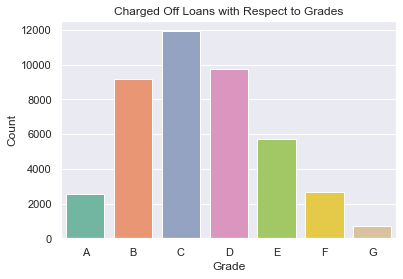

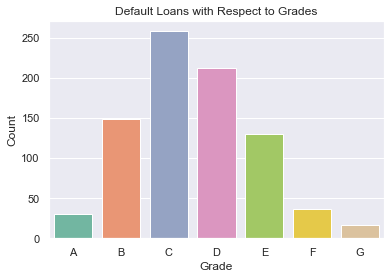

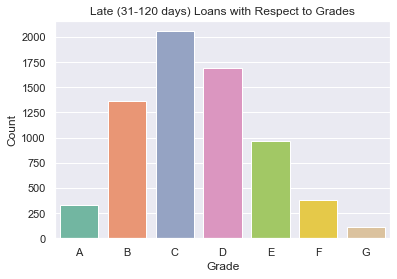

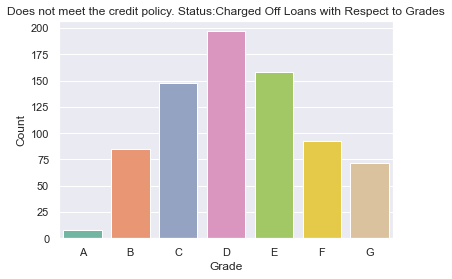

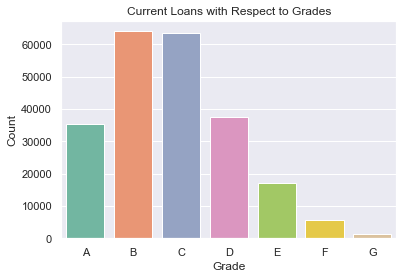

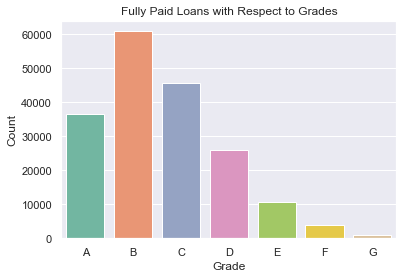

In [7]:
# Visualisasi grade untuk setiap status loan
sns.set(rc ={'figure.figsize':(10, 5)})
def loan_grade(name):
    data = df[df['loan_status'] == name]
    data_grade = data.groupby(['grade']).size().reset_index(name='count')
    
    sns.barplot(x='grade', y='count', data=data_grade, hue='grade', palette='Set2')
    plt.title(f'{name} Loans with Respect to Grades')
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.show()

loan_grade('Charged Off')
loan_grade('Default')
loan_grade('Late (31-120 days)')
loan_grade('Does not meet the credit policy. Status:Charged Off')
loan_grade('Current')
loan_grade('Fully Paid')

Dari visualisasi pesebaran data pinjaman terhadap Grade-nya, terlihat bahwa banyak pinjaman yang masuk kategori 'BAD' memiliki grade C dan D, sedangkan pinjaman yang termasuk kategori 'GOOD' cenderung memiliki grade B dan C.

Hal ini dapat dijadikan pertimbangan lebih lanjut untuk menentukan kategori data pinjaman yang berstatus `In Grace Period` dan `Late (16-30 days)`. Pinjaman tersebut yang memiliki grade D ke bawah akan dikategorikan sebagai pinjaman 'BAD' dikarenakan indikasi riwayat pinjaman yang buruk.

In [8]:
# membuat fungsi untuk assign kolom target
def assign_target(stat, grade):
    good_stat = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid']
    bad_stat = ['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']
    
    if (stat in good_stat):
        return int('0')
    elif (stat in bad_stat):
        return int('1')
    else:
        good_grade = ['A', 'B', 'C']
        bad_grade = ['D', 'E', 'F', 'G']
        
        if grade in bad_grade:
            return int('1')
        elif grade in good_grade:
            return int('0')
        else:
            return np.nan

In [9]:
# salin dataframe ke dataframe baru
df_target = df.copy()

# vectorized fungsi assign target
assign_vect = np.vectorize(assign_target)

# pass argument ke fungsi dan tampung hasil pada dataframe baru
df_target['target'] = assign_vect(df_target['loan_status'], df['grade'])

In [10]:
df_target

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,D

In [11]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Penghapusan Kolom-Kolom Tertentu

Beberapa kolom dirasa tidak memiliki pengaruh yang signifikan terhadap pemodelan dan analisa data. Penghapusan kolom-kolom ini ditujukan untuk dapat melakukan analisa yang lebih efektif dan hasil yang lebih akurat.

Selain itu ada beberapa kolom yang memiliki nilai yang tidak dapat memberikan insight, seperti kolom `id` yang merupakan sebuah kode penanda unik untuk setiap data serta kolom-kolom seperti `policy_code` dan `application_type` yang hanya memiliki satu value untuk semua data. Kemudian ada kolom-kolom yang berisi data string, salah satu contohnya adalah `desc`.

In [13]:
# Penghapusan kolom-kolom dengan data null (tidak ada data sama sekali)
df_target = df_target.loc[:,df_target.notna().any(axis=0)]

# menghapus kolom-kolom yang tidak relevan atau tidak digunakan
del_cols = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'emp_title', 'title', 
            'zip_code', 'earliest_cr_line', 'collection_recovery_fee', 'issue_d',
            'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
            'application_type', 'policy_code']

# drop columns
df_target = df_target.drop(del_cols, axis=1)

In [14]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

### Handling Missing Values

<Axes: >

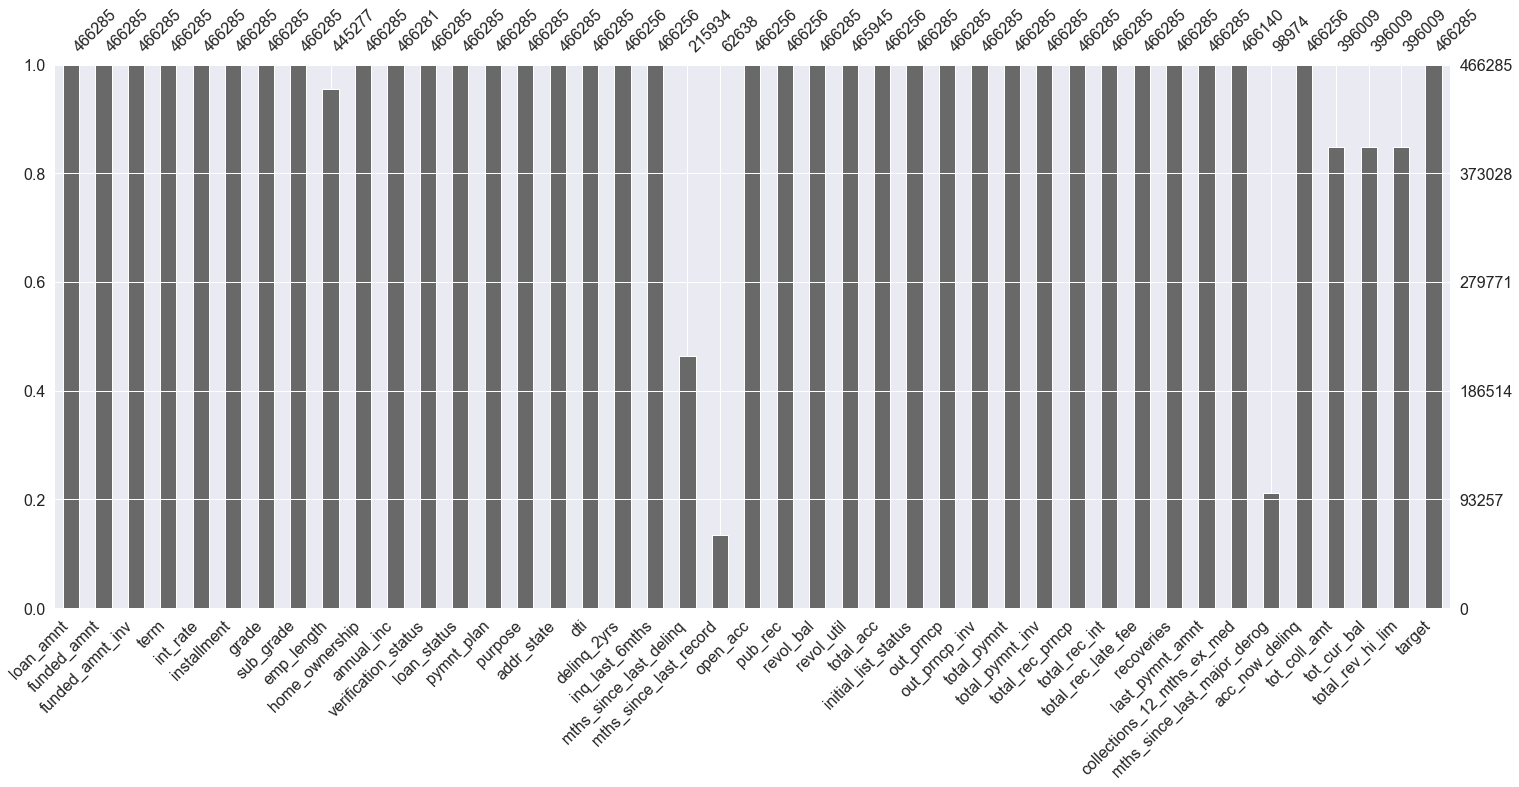

In [15]:
# pengecekan missing values menggunakan library missingno
msno.bar(df_target)

In [16]:
df_target.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list

Kolom-kolom yang memiliki missing values lebih besar dari 50% dihapus karena tidak memungkinkan untuk melakukan imputasi terhadap data-data yang hilang tersebut. Hal ini dapat mempengaruhi analisa data dan pemodelan 

In [17]:
# menghapus kolom dengan missing values lebih dari 50%
for col in df_target.columns:
    if ((df_target[col].isna().sum()/len(df_target))*100) >= 50:
        df_target = df_target.drop([col], axis=1)

Lakukan pengecekan lebih lanjut terhadap data-data yang missing lainnya.

<Axes: >

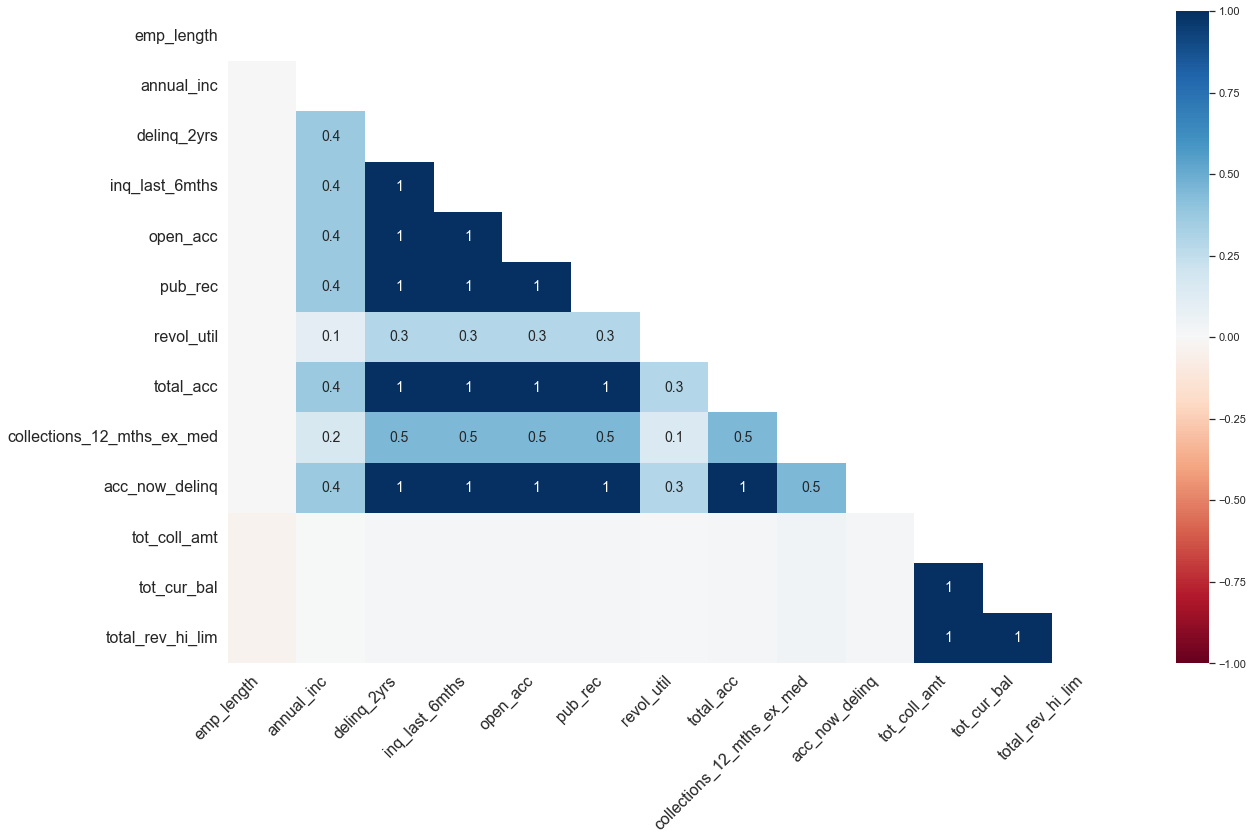

In [18]:
msno.heatmap(df_target)

<Axes: >

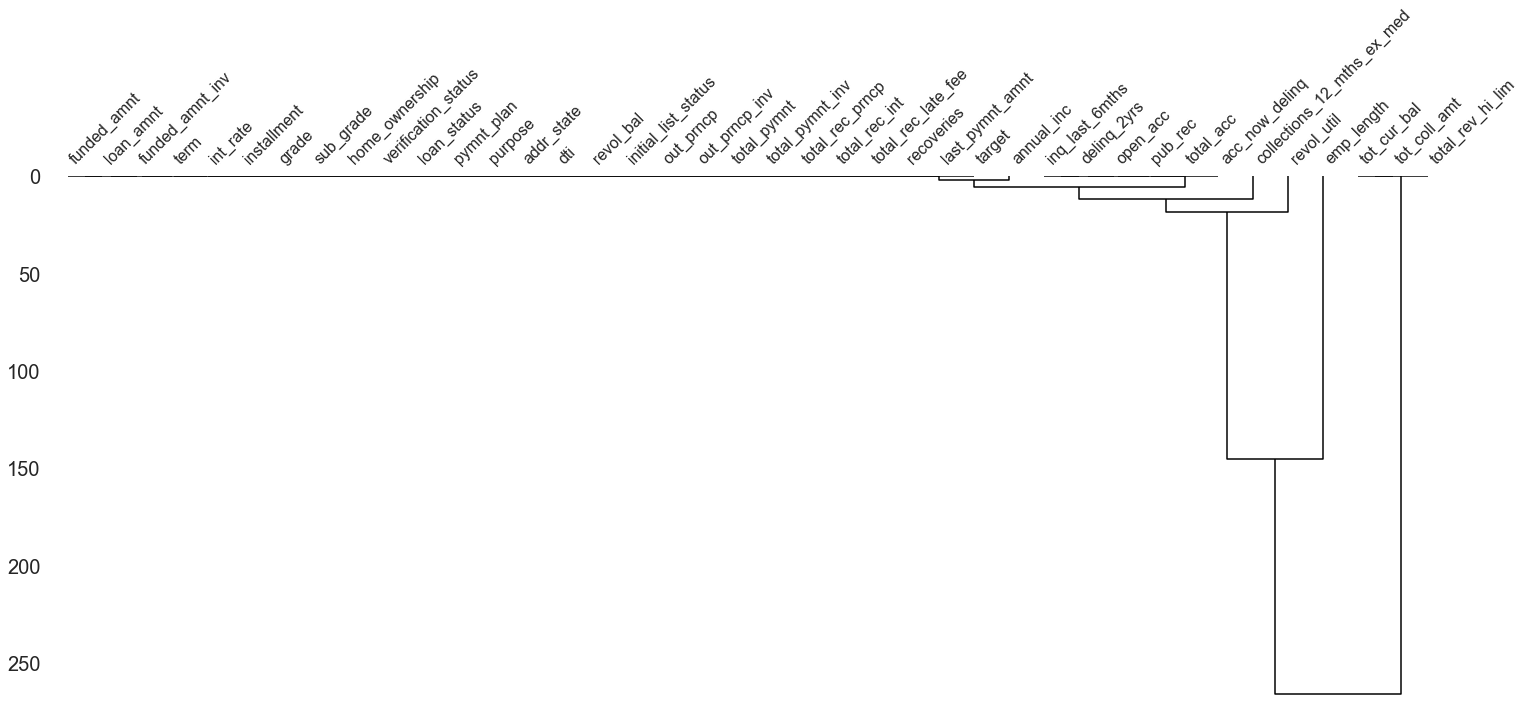

In [19]:
msno.dendrogram(df_target)

Dari pengecekan lebih lanjut, terlihat ada banyak data hilang yang terindikasi MCAR (Missing Completely at Random). Untuk meng-handle missing value dilakukan imputasi di beberapa kolom serta penghapusan missing data khusus untuk kolom-kolom `tot_coll_amt`, `tot_cur_bal`, dan `total_rev_hi_lim` di karenakan memiliki lebih dari 70.000 MCAR missing data.

In [20]:
# menghapus baris data missing dari kolom 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'
df_target = df_target.dropna(axis=0, subset=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'])

df_target.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    18947
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      219
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                 

Dari hasil penghapusan tiga kolom tersebut, terlihat mayoritas data missing ikut terhapus. Ini berarti bahwa kebanyakan dari data missing pada kolom lain, memiliki data missing juga pada kolom-kolom `tot_coll_amt`, `tot_cur_bal`, dan `total_rev_hi_lim`.

Untuk kolom `emp_length` akan dilakukan imputasi KNN, sedangkan kolom `revol_util` akan dilakukan imputasi mean / median.

##### Imputasi KNN kolom `emp_length`

In [21]:
# ambil hanya kolom-kolom numerik dan kolom `emp_length` saja
numerical_cols = [cname for cname in df_target.columns
                 if df_target[cname].dtype in ["int32", "int64", "float64"]]

numerical_cols.append('emp_length')

df_with_null = df_target[numerical_cols]

# import library yang dibutuhkan
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict & Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    #Minmaxscaler and KNN imputation 
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df[cols]


#Imputation
df_imput = imputation(df_with_null, ['emp_length'])

C:\Users\USER\AppData\Local\Temp/ipykernel_8280/1577877546.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[27050.  9750. 12000. ... 20700.  2000. 10000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)
C:\Users\USER\AppData\Local\Temp/ipykernel_8280/1577877546.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[27050.  9750. 12000. ... 20700.  2000. 10000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)
C:\Users\USER\AppData\Local\Temp/ipykernel_8280/1577877546.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[36638.  7967. 13168. ...  6688. 11404. 11325.]' has dtype incompatible with int64, please

In [22]:
# gabungkan kolom `emp_length` yang telah diimputasi dengan dataframe utama
df_target = df_target.drop(columns=['emp_length'])
df_target['emp_length'] = df_imput

In [23]:
# imputasi kolom `revol_util` dengan mean
df_target['revol_util'] = df_target['revol_util'].fillna(df_target['revol_util'].mean())

### Checking Anomaly Outliers

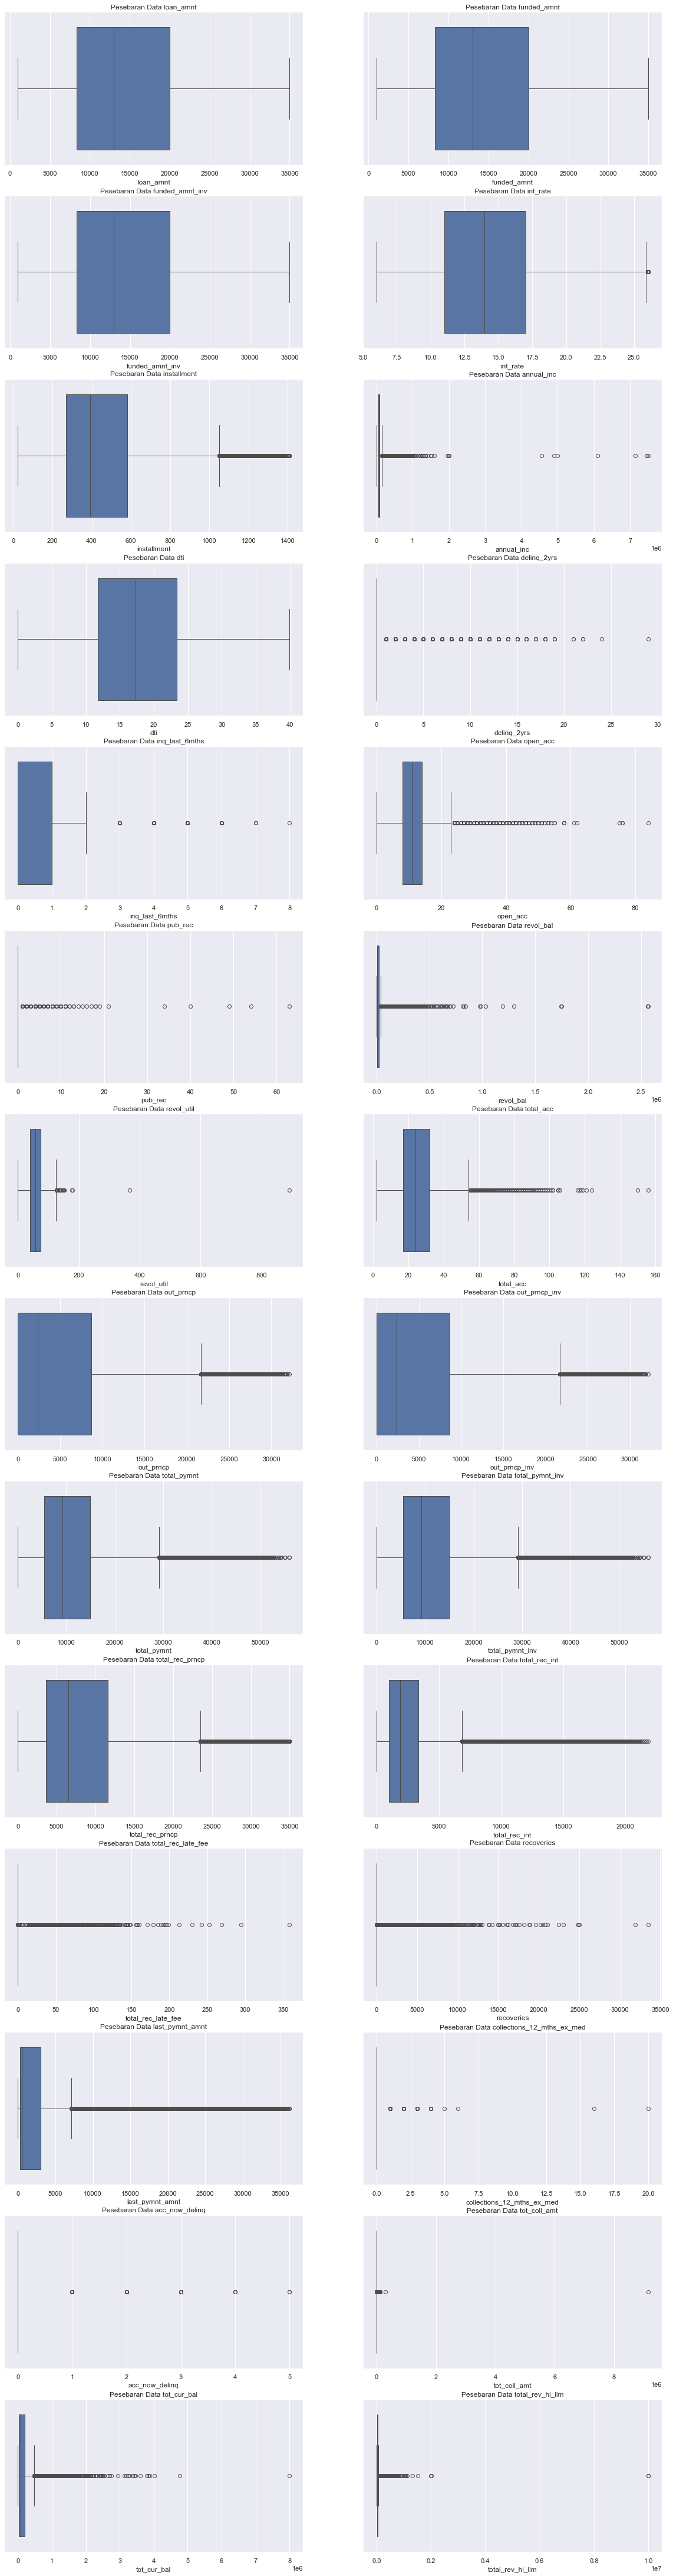

In [25]:
numerical_cols = [cname for cname in df_target.columns
                 if df_target[cname].dtype in ["int64", "float64"]]

# visualisasikan pesebaran data setiap kolom numerik
plt.figure(figsize=(20, 85))
for i, col in enumerate(list(numerical_cols), 1):
    plt.subplot(15, 2, i)
    sns.boxplot(x=col, data=df_target[df_target.columns[:-1]])
    plt.title("Pesebaran Data " + col)

Dari hasil pengecekan data anomali, terdapat beberapa data di beberapa kolom yang memiliki jarak sangat ekstrim. Data-data yang berjarak sangat ekstrim ini dianggap sebagai anomali yang tidak dapat dijelaskan penyebabnya dan dihapus agar tidak menyebabkan kesalahan saat analisis 

In [26]:
# menghapus data-data anomali
df_target = df_target.drop(df_target[(df_target['annual_inc'] > 2000000) |
                                  (df_target['revol_bal'] > 800000) |
                                  (df_target['revol_util'] > 200) |
                                  (df_target['tot_coll_amt'] > 1000000) |
                                  (df_target['tot_cur_bal'] > 3000000) |
                                  (df_target['total_rev_hi_lim'] > 1000000)].index)

## Exploratory Data Analysis

### Pesebaran Data Target

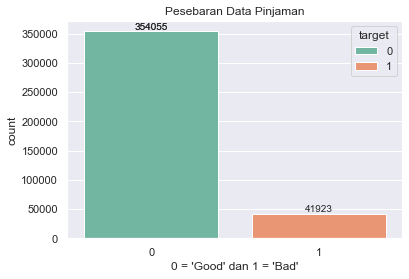

In [27]:
# melihat pesebaran data menggunakan Countplot
fig = plt.figure()
ax = sns.countplot(x=df_target['target'], hue=df_target['target'], palette='Set2')
ax.bar_label(ax.containers[0])

plt.title("Pesebaran Data Pinjaman")
plt.xlabel("0 = 'Good' dan 1 = 'Bad'")
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

Pesebaran data target sangat tidak seimbang (imbalance data). Hanya terdapat sekitar 10% data yang merupakan pinjaman bermasalah (Bad Loans). Hal ini menjadi catatan penting dalam pemilihan metrik evaluasi saat melakukan modelling.

### Analisa Data Kolom-Kolom Kategorikal

In [28]:
# fungsi untuk mempermudah visualisasi kolom kategorikal
def vis_cat(cat_column, title_count, title_stacked, label):
    fig = plt.figure(figsize=(12, 5))
    
    ax = fig.add_subplot(121)
    sns.countplot(data=df_target, x=cat_column, hue='target', palette = 'Set2')
    ax.set_title(title_count)
    plt.xlabel(label)
    plt.ylabel("Count")
    for i in ax.containers:
        ax.bar_label(i,)
    
    ax2 = fig.add_subplot(122)
    pd.crosstab(df_target[cat_column], df_target['target']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, ax=ax2, rot=0)
    ax2.set_title(title_stacked)
    plt.xlabel(label)
    plt.ylabel("Persentase")

    fig.tight_layout(pad=2)

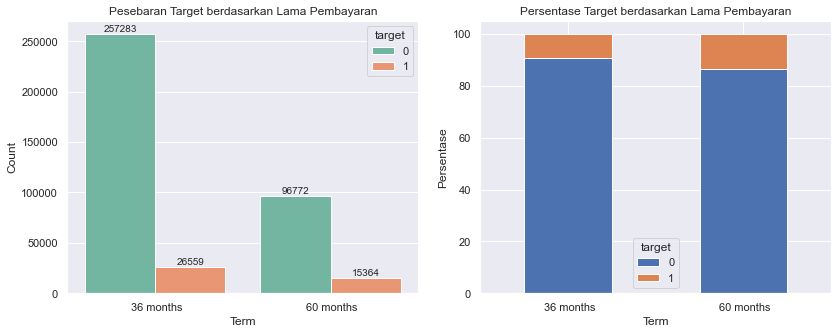

In [29]:
# pesebaran data Target dan perbandingannya dengan lama pembayaran
col = 'term'
title_c = 'Pesebaran Target berdasarkan Lama Pembayaran'
title_b = 'Persentase Target berdasarkan Lama Pembayaran'
label = 'Term'

vis_cat(col, title_c, title_b, label)

Lama waktu pembayaran terbanyak adalah 36 bulan, namun persentase pinjaman yang terindikasi jelek lebih besar pada jenis pinjaman 60 bulan.

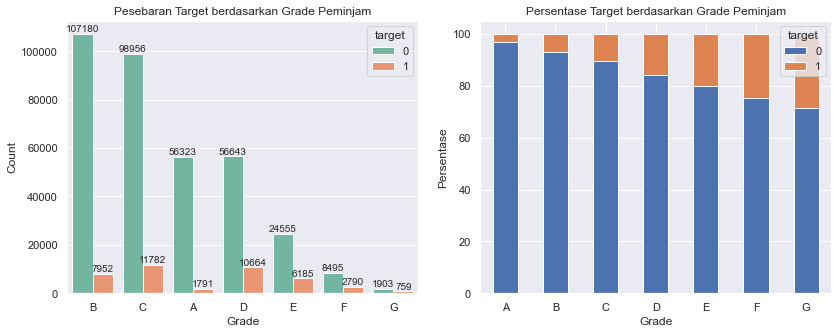

In [30]:
# pesebaran data Target dan perbandingannya dengan riwayat grade peminjam
col = 'grade'
title_c = 'Pesebaran Target berdasarkan Grade Peminjam'
title_b = 'Persentase Target berdasarkan Grade Peminjam'
label = 'Grade'

vis_cat(col, title_c, title_b, label)

Mayoritas pinjaman memiliki riwayat grade B dan C. Sementara terdapat pola di mana, semakin rendah grade peminjam, maka akan semakin besar resiko peminjaman tersebut (semakin BAD).

Text(0, 0.5, 'Persentase')

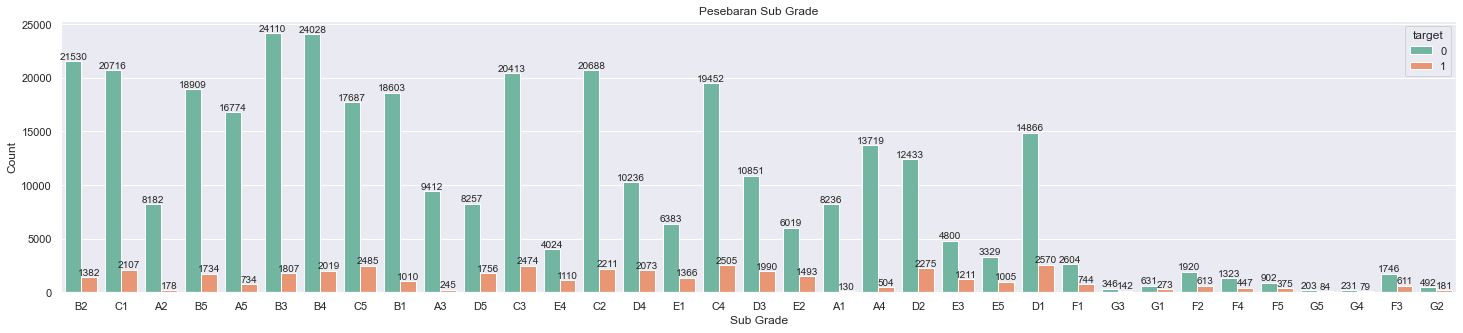

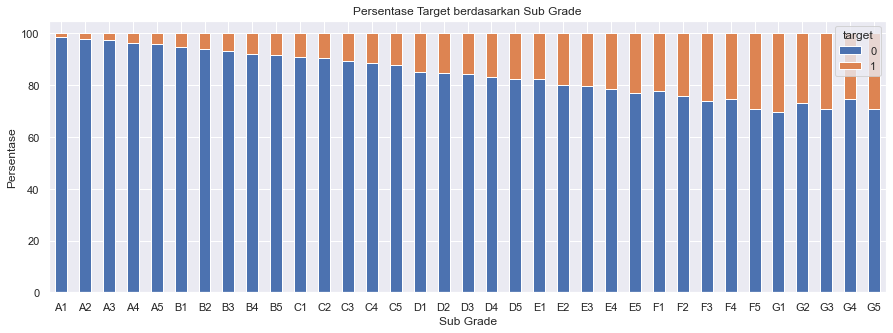

In [31]:
# pesebaran data Target dan perbandingannya dengan Sub Grade
fig = plt.figure(figsize=(25, 5))
ax = sns.countplot(data=df_target, x='sub_grade', hue='target', palette = 'Set2')
ax.set_title('Pesebaran Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(df_target['sub_grade'], df_target['target']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(15, 5))
ax2.set_title("Persentase Target berdasarkan Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Persentase")

Pesebaran data pinjaman mayoritas memiliki Sub-Grade B3 dan B4. Sub-Grade dengan pinjaman beresiko terbanyak adalah D1. Pola yang ditunjukkan selaras dengan pola Grade, di mana semakin rendah Sub-Grade maka akan semakin besar resiko pinjaman tersebut.

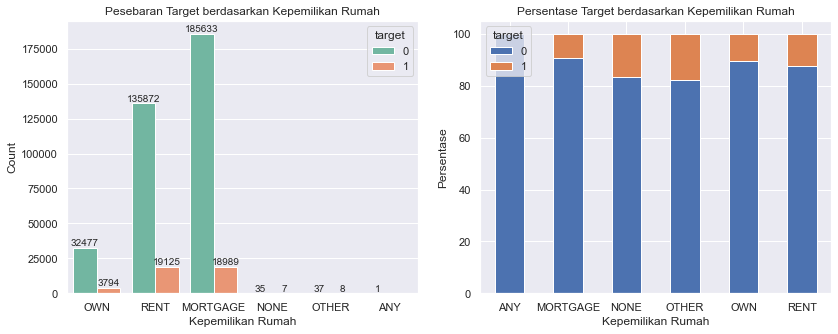

In [32]:
# pesebaran data Target dan perbandingannya dengan kepemilikan rumah
col = 'home_ownership'
title_c = 'Pesebaran Target berdasarkan Kepemilikan Rumah'
title_b = 'Persentase Target berdasarkan Kepemilikan Rumah'
label = 'Kepemilikan Rumah'

vis_cat(col, title_c, title_b, label)

Mayoritas data kepemilikan rumah adalah Kredit Rumah, dan pinjaman beresiko paling banyak merupakan tempat tinggal mengontrak. Persentase pinjaman berisiko paling tinggi ada pada peminjam yang tidak memiliki rumah dan status penghuni yang lain, namun datanya masih cukup sedikit. Mereka yang tempat tinggal mengontrak persentase pinjaman berisiko nya lebih tinggi.

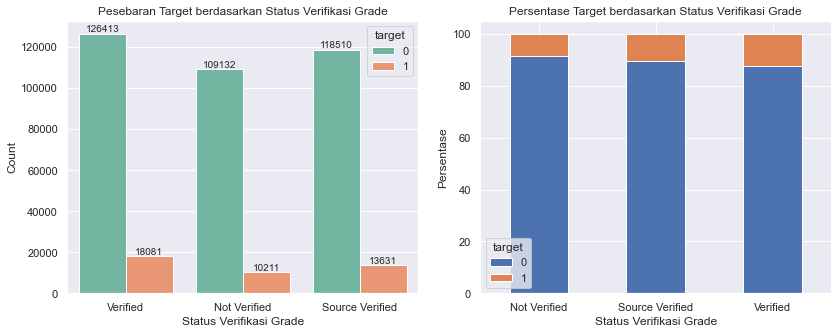

In [33]:
# pesebaran data Target dan perbandingannya dengan status verifikasi grade
col = 'verification_status'
title_c = 'Pesebaran Target berdasarkan Status Verifikasi Grade'
title_b = 'Persentase Target berdasarkan Status Verifikasi Grade'
label = 'Status Verifikasi Grade'

vis_cat(col, title_c, title_b, label)

Pesebaran terbanyak ada pada jenis peminjam yang riwayatnya ter-verified, namun perbedaannya dengan yang lain tidak terlalu jauh. Persentase pinjaman dengan resiko buruk juga terdapat pada verified.

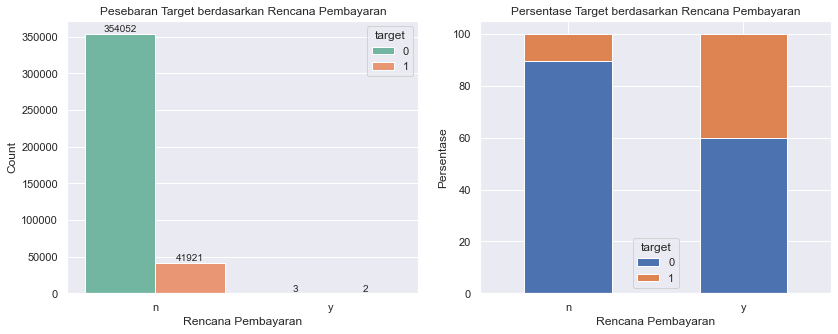

In [34]:
# pesebaran data Target dan perbandingannya dengan rencana pembayaran
col = 'pymnt_plan'
title_c = 'Pesebaran Target berdasarkan Rencana Pembayaran'
title_b = 'Persentase Target berdasarkan Rencana Pembayaran'
label = 'Rencana Pembayaran'

vis_cat(col, title_c, title_b, label)

Uniknya, hampir seluruh pinjaman tidak menempatkan rencana pembayaran terhadap kredit mereka.

Text(0, 0.5, 'Persentase')

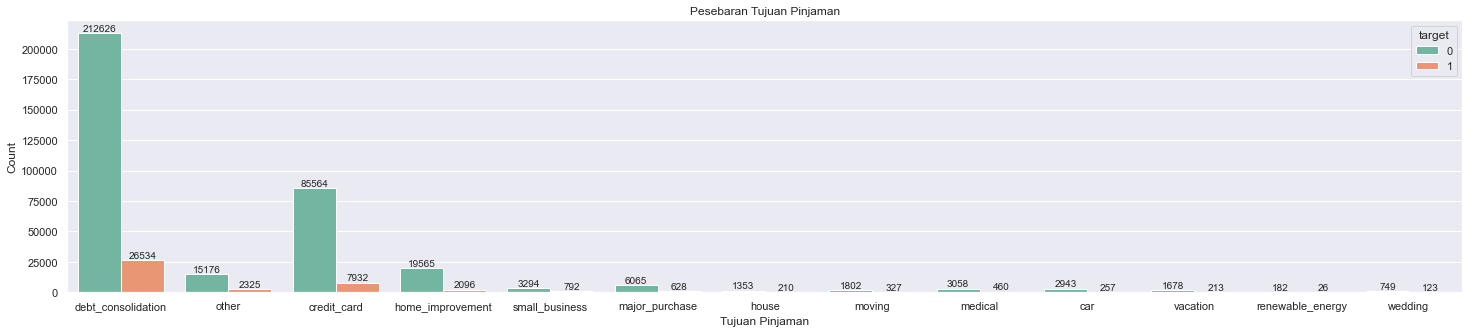

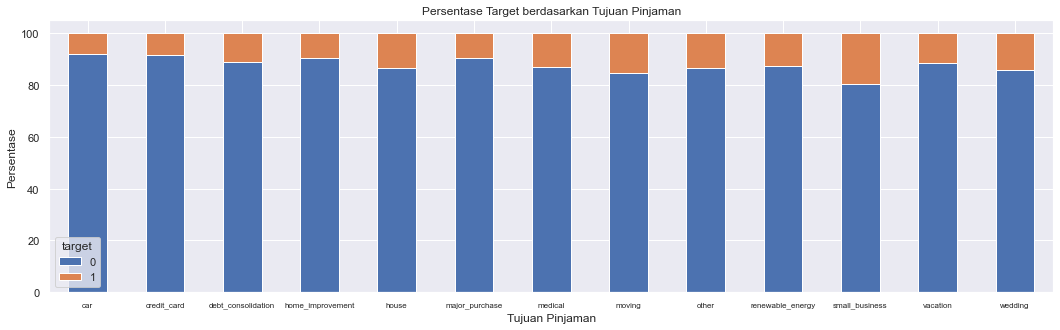

In [35]:
# pesebaran data Target dan perbandingannya dengan Tujuan Pinjaman
fig = plt.figure(figsize=(25, 5))
ax = sns.countplot(data=df_target, x='purpose', hue='target', palette = 'Set2')
ax.set_title('Pesebaran Tujuan Pinjaman')
plt.xlabel('Tujuan Pinjaman')
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(df_target['purpose'], df_target['target']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(18, 5))
ax2.set_title("Persentase Target berdasarkan Tujuan Pinjaman")
plt.xticks(fontsize=8)
plt.xlabel("Tujuan Pinjaman")
plt.ylabel("Persentase")

Kebanyakan pinjaman ditujukan untuk pembayaran hutang dan kartu kredit. Persentase tertinggi pinjaman beresiko adalah pinjaman yang ditujukan untuk memulai bisnis kecil, pindahan, kesehatan, dan pernikahan.

Text(0, 0.5, 'Persentase')

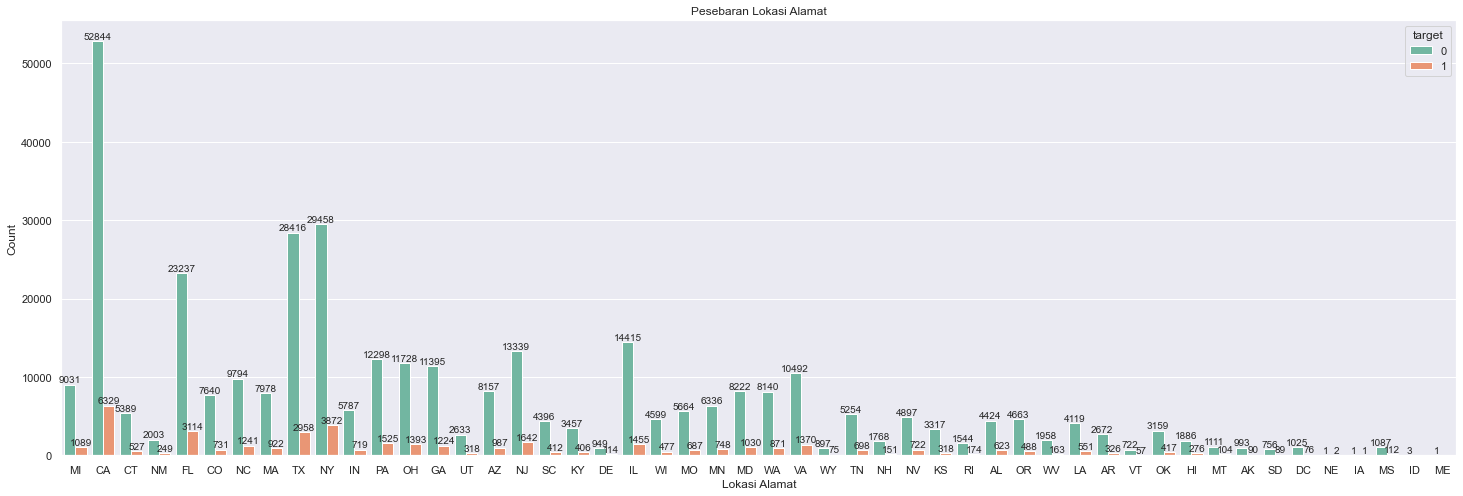

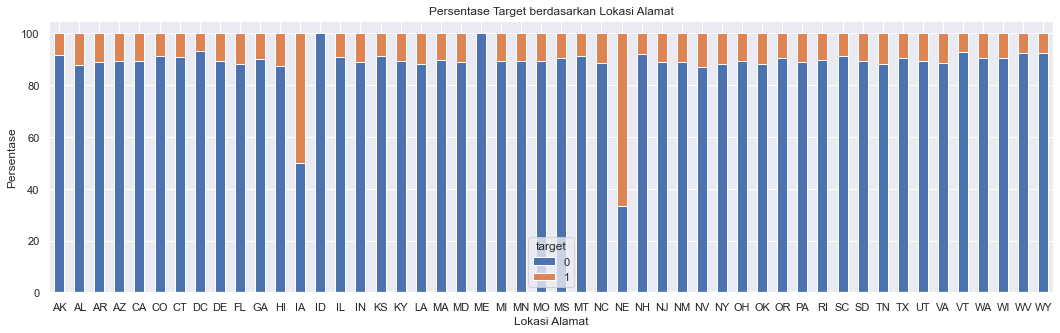

In [36]:
# pesebaran data Target dan perbandingannya dengan lokasi alamat
fig = plt.figure(figsize=(25, 8))
ax = sns.countplot(data=df_target, x='addr_state', hue='target', palette = 'Set2')
ax.set_title('Pesebaran Lokasi Alamat')
plt.xlabel('Lokasi Alamat')
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(df_target['addr_state'], df_target['target']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(18, 5))
ax2.set_title("Persentase Target berdasarkan Lokasi Alamat")
plt.xlabel("Lokasi Alamat")
plt.ylabel("Persentase")

Mayoritas peminjam berasal dari negara bagian California dan disusul oleh New York, Texas, dan Florida. Persentase pinjaman beresiko terbesar ada pada negara bagian Nevada, Hawaii, dan Alaska. Sedangkan untuk persentase terendah ada pada District of Columbia dan Vermont.

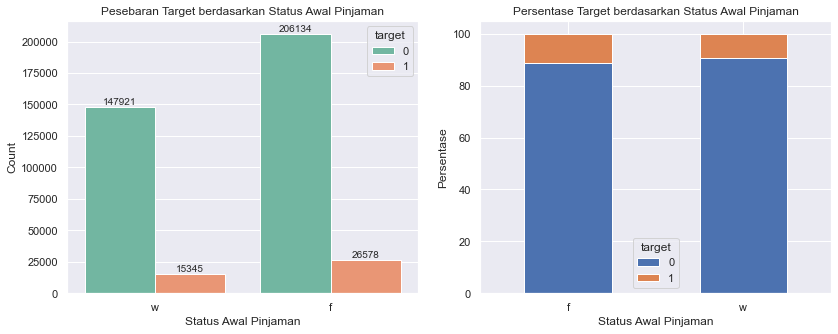

In [37]:
# pesebaran data Target dan perbandingannya dengan status awal pinjaman
col = 'initial_list_status'
title_c = 'Pesebaran Target berdasarkan Status Awal Pinjaman'
title_b = 'Persentase Target berdasarkan Status Awal Pinjaman'
label = 'Status Awal Pinjaman'

vis_cat(col, title_c, title_b, label)

Status Awal Pinjaman mayoritas adalah Fractional, meskipun tidak jauh berbeda dengan status Whole. Persentase kredit beresiko juga tidak terlalu berbeda.

Text(0, 0.5, 'Persentase')

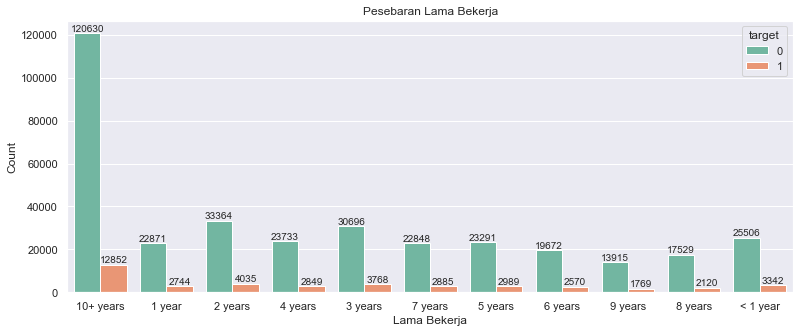

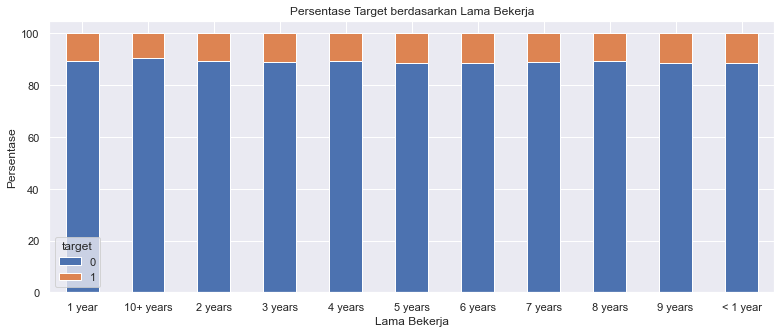

In [38]:
# pesebaran data Target dan perbandingannya dengan lama bekerja
fig = plt.figure(figsize=(13, 5))
ax = sns.countplot(data=df_target, x='emp_length', hue='target', palette = 'Set2')
ax.set_title('Pesebaran Lama Bekerja')
plt.xlabel('Lama Bekerja')
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

ax2 = pd.crosstab(df_target['emp_length'], df_target['target']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar', stacked = True, rot=0, figsize=(13, 5))
ax2.set_title("Persentase Target berdasarkan Lama Bekerja")
plt.xlabel("Lama Bekerja")
plt.ylabel("Persentase")

Peminjam terbanyak adalah mereka yang sudah bekerja lebih dari 10 tahun, kemudian ada mereka yang bekerja 2 tahun. Persentase pinjaman beresiko terbesar ada pada mereka yang baru bekerja kurang dari setahun, meskipun besaran persentase nya tidak terlalu berbeda dengan yang lain.

### Analisa Data Kolom-Kolom Numerikal

In [39]:
# cek kolom dengan tipe data numerikal
numerical_cols = [cname for cname in df_target.columns
                 if df_target[cname].dtype in ["int64", "float64"]]

#numerical_cols.remove('target')

df_target[numerical_cols].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,27050.0,10.99,885.46,55000.0,22.87,0.0,0.0,14.0,0.0,36638,61.2,27.0,10018.90,10018.90,21251.040000,21251.04,17031.10,4219.94,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,59900.0
42536,9750,9750,9750.0,13.98,333.14,26000.0,25.12,0.0,0.0,12.0,0.0,7967,52.8,28.0,3710.96,3710.96,7994.830000,7994.83,6039.04,1955.79,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,15100.0
42537,12000,12000,12000.0,6.62,368.45,105000.0,14.05,0.0,1.0,12.0,0.0,13168,21.6,22.0,4266.62,4266.62,8842.800000,8842.80,7733.38,1109.42,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,61100.0
42538,12000,12000,12000.0,13.53,407.40,40000.0,16.94,0.0,0.0,7.0,2.0,5572,68.8,32.0,0.00,0.00,13359.770000,13359.77,11999.99,1359.78,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,8100.0
42539,15000,15000,15000.0,8.90,476.30,63000.0,16.51,0.0,0.0,8.0,0.0,11431,74.2,29.0,5449.27,5449.27,11431.200000,11431.20,9550.73,1880.47,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,15400.0
42540,12000,12000,12000.0,11.99,398.52,130000.0,13.03,0.0,1.0,9.0,0.0,10805,67.0,19.0,4485.45,4485.45,9564.400000,9564.40,7514.55,2049.85,0.0,0.0,398.52,0.0,0.0,0.0,327264.0,16200.0
42541,14000,14000,14000.0,12.85,470.71,88000.0,10.02,1.0,0.0,6.0,1.0,3686,81.9,14.0,5274.10,5274.10,11296.940000,11296.94,8725.90,2571.04,0.0,0.0,470.71,0.0,0.0,0.0,17672.0,4500.0
42542,7550,7550,7550.0,16.24,266.34,28000.0,8.40,0.0,0.0,4.0,0.0,5759,72.0,5.0,2931.48,2931.48,6407.380000,6407.38,4618.52,1788.86,0.0,0.0,266.34,0.0,0.0,0.0,5759.0,8000.0
42543,10000,10000,10000.0,9.67,321.13,102000.0,15.55,2.0,0.0,9.0,0.0,9912,44.4,22.0,3659.12,3659.12,7706.810000,7706.81,6340.88,1365.93,0.0,0.0,321.13,0.0,0.0,0.0,39143.0,22300.0
42544,3000,3000,3000.0,12.85,100.87,25000.0,24.68,0.0,0.0,5.0,2.0,2875,54.2,26.0,0.00,0.00,3181.532981,3181.53,3000.00,181.53,0.0,0.0,2677.23,0.0,0.0,154.0,19530.0,5300.0


In [40]:
# Analisa statistik deskriptif untuk setiap kolom numerik
df_target[numerical_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,3.959780e+05,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.000000,395978.00000,3.959780e+05,395978.000000
mean,14739.514758,14739.476372,14732.960887,14.051595,445.215248,7.391883e+04,17.729222,0.308204,0.775053,11.441466,0.180626,16522.433105,56.884470,25.527330,5146.414932,5144.664431,11316.768087,11311.231317,8626.207828,2609.652569,0.541105,80.366590,3167.019346,0.010695,0.004700,168.81432,1.386481e+05,30287.809866
std,8304.661930,8304.617252,8301.322246,4.378413,243.742838,4.783773e+04,7.877442,0.834306,1.036188,5.026856,0.543905,19226.949159,22.904862,11.587972,6604.426735,6602.513564,8046.638610,8042.317928,6956.424768,2414.363876,4.843932,521.511947,5680.440604,0.117809,0.074372,1586.79042,1.501591e+05,28890.138935
min,1000.000000,1000.000000,950.000000,6.000000,23.260000,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000
25%,8325.000000,8325.000000,8325.000000,10.990000,269.520000,4.500000e+04,11.800000,0.000000,0.000000,8.000000,0.000000,6704.000000,40.500000,17.000000,0.000000,0.000000,5499.280000,5497.460000,3600.000000,1003.155000,0.000000,0.000000,319.270000,0.000000,0.000000,0.00000,2.861600e+04,13500.000000
50%,13000.000000,13000.000000,13000.000000,13.980000,392.630000,6.400000e+04,17.340000,0.000000,0.000000,11.000000,0.000000,12081.000000,58.000000,24.000000,2341.310000,2340.990000,9235.805000,9230.615000,6500.000000,1871.580000,0.000000,0.000000,541.810000,0.000000,0.000000,0.00000,8.152850e+04,22800.000000
75%,20000.000000,20000.000000,20000.000000,16.990000,581.600000,9.000000e+04,23.400000,0.000000,1.000000,14.000000,0.000000,20746.000000,74.700000,32.000000,8673.990000,8669.540000,14955.491483,14946.807500,11558.527500,3345.500000,0.000000,0.000000,3058.720000,0.000000,0.000000,0.00000,2.089370e+05,37900.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,2.000000e+06,39.990000,29.000000,8.000000,84.000000,63.000000,722995.000000,180.300000,156.000000,32160.380000,32160.380000,56087.909920,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,36234.440000,20.000000,5.000000,296368.00000,2.940054e+06,903300.000000


In [41]:
# tampilkan nilai correlation setiap kolom numerik
df_target[numerical_cols].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.999998,0.999993,0.127330,0.949800,0.431330,0.034892,0.000522,-0.010135,0.194204,-0.098162,0.363907,0.117752,0.222798,0.539449,0.539423,0.736423,0.736494,0.594233,0.719029,0.052176,0.106877,0.286395,-0.013326,0.003645,-0.019444,0.335176,0.369257
funded_amnt,0.999998,1.000000,0.999995,0.127326,0.949803,0.431325,0.034890,0.000520,-0.010142,0.194197,-0.098162,0.363905,0.117751,0.222791,0.539454,0.539428,0.736426,0.736497,0.594239,0.719029,0.052177,0.106861,0.286398,-0.013326,0.003646,-0.019443,0.335173,0.369255
funded_amnt_inv,0.999993,0.999995,1.000000,0.127506,0.949796,0.431346,0.034895,0.000539,-0.010048,0.194227,-0.098142,0.363874,0.117752,0.222793,0.539627,0.539604,0.736276,0.736356,0.594070,0.719018,0.052172,0.106844,0.286361,-0.013324,0.003639,-0.019442,0.335166,0.369224
int_rate,0.127330,0.127326,0.127506,1.000000,0.105991,-0.078999,0.143498,0.063873,0.229773,-0.015020,0.056101,-0.025803,0.291211,-0.054940,0.110138,0.110170,0.103134,0.103319,-0.055731,0.476085,0.060432,0.130081,0.062212,0.017348,0.029629,0.003771,-0.098280,-0.186747
installment,0.949800,0.949803,0.949796,0.105991,1.000000,0.427615,0.024435,0.009836,0.016523,0.183638,-0.086964,0.348989,0.132319,0.202489,0.416545,0.416523,0.767217,0.767299,0.655189,0.646498,0.061439,0.104629,0.287102,-0.011437,0.006288,-0.017607,0.302279,0.342650
annual_inc,0.431330,0.431325,0.431346,-0.078999,0.427615,1.000000,-0.229427,0.067382,0.071385,0.172981,-0.022277,0.374971,0.047411,0.245717,0.204148,0.204154,0.344205,0.344255,0.312524,0.242904,0.027577,0.017360,0.157146,-0.001772,0.019844,0.005637,0.534949,0.373808
dti,0.034892,0.034890,0.034895,0.143498,0.024435,-0.229427,1.000000,-0.013862,-0.001452,0.286377,-0.065485,0.144570,0.176650,0.213009,0.085544,0.085529,-0.030820,-0.030815,-0.066455,0.083521,0.005051,0.024198,-0.052784,-0.005520,0.006350,-0.016874,-0.018158,0.079751
delinq_2yrs,0.000522,0.000520,0.000539,0.063873,0.009836,0.067382,-0.013862,1.000000,0.023945,0.053893,-0.018688,-0.035752,-0.016711,0.129953,0.026499,0.026493,-0.015627,-0.015607,-0.026267,0.022486,0.028695,0.004886,-0.015576,0.038046,0.128914,0.006048,0.073480,-0.044504
inq_last_6mths,-0.010135,-0.010142,-0.010048,0.229773,0.016523,0.071385,-0.001452,0.023945,1.000000,0.106454,0.045849,-0.019776,-0.095519,0.139305,-0.061701,-0.061700,0.033522,0.033644,0.014829,0.059337,0.017463,0.044561,0.050343,0.000510,-0.006173,0.014246,0.059943,0.009296
open_acc,0.194204,0.194197,0.194227,-0.015020,0.183638,0.172981,0.286377,0.053893,0.106454,1.000000,-0.045448,0.232252,-0.149195,0.678844,0.123457,0.123460,0.123177,0.123217,0.100751,0.117317,0.001671,0.013499,0.049307,0.008181,0.016539,0.005666,0.245931,0.372381


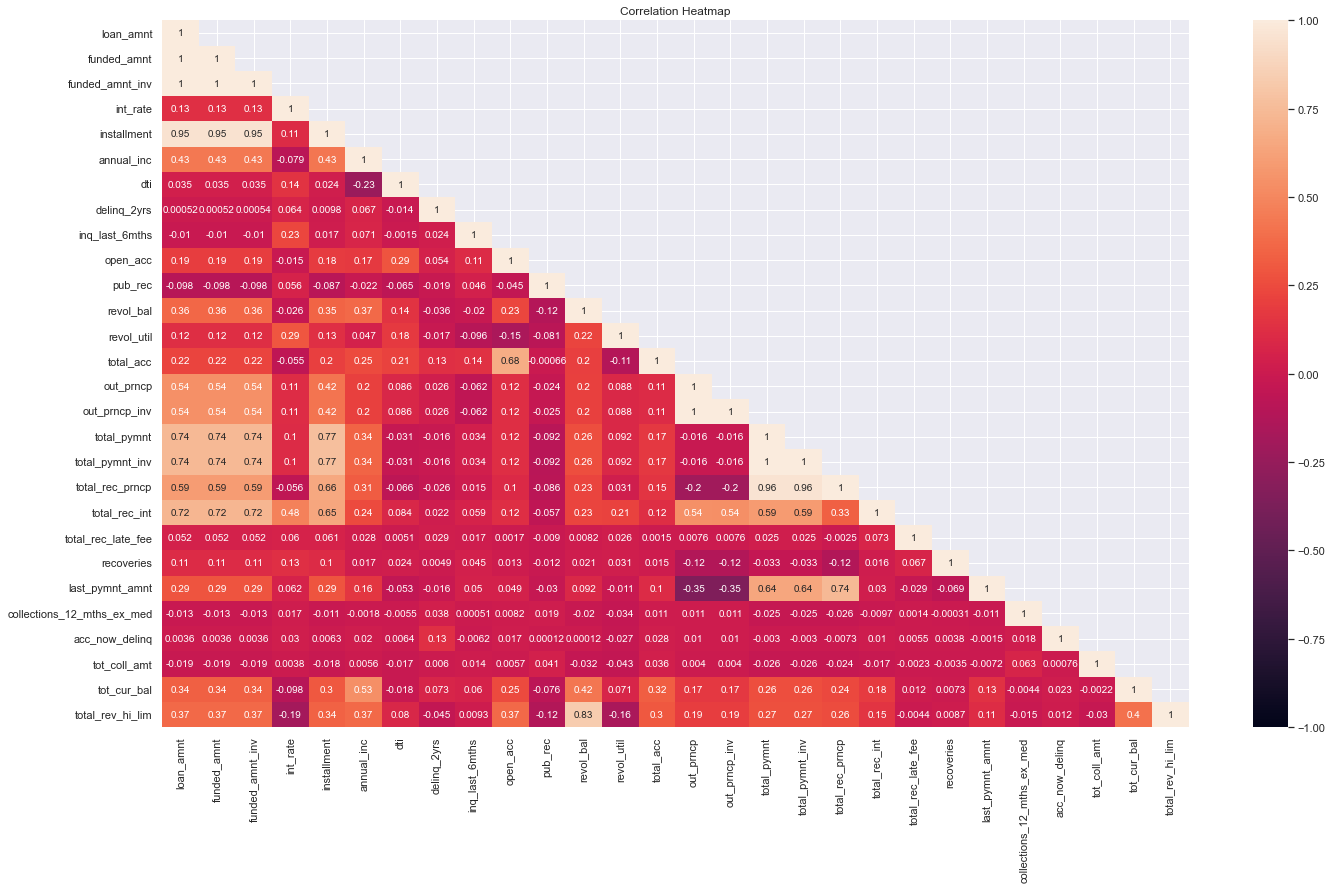

In [42]:
# visualisasi correlation setiap kolom numerik menggunakan heatmap
plt.figure(figsize=(23, 13))

heatmap = sns.heatmap(df_target[numerical_cols].corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(df_target[numerical_cols].corr(), k=1))
heatmap.set_title('Correlation Heatmap');

Korelasi positif banyak terjadi pada data-data yang tentang jumlah pinjaman yang diberikan dan kaitannya dengan hal-hal yang berhubungan dengan pembayarannya. Selain itu, juga terdapat korelasi positif yang tidak terlalu signifikan terhadap jumlah penghasilan peminjam dengan jumlah pinjaman yang diajukan atau yang diterima.

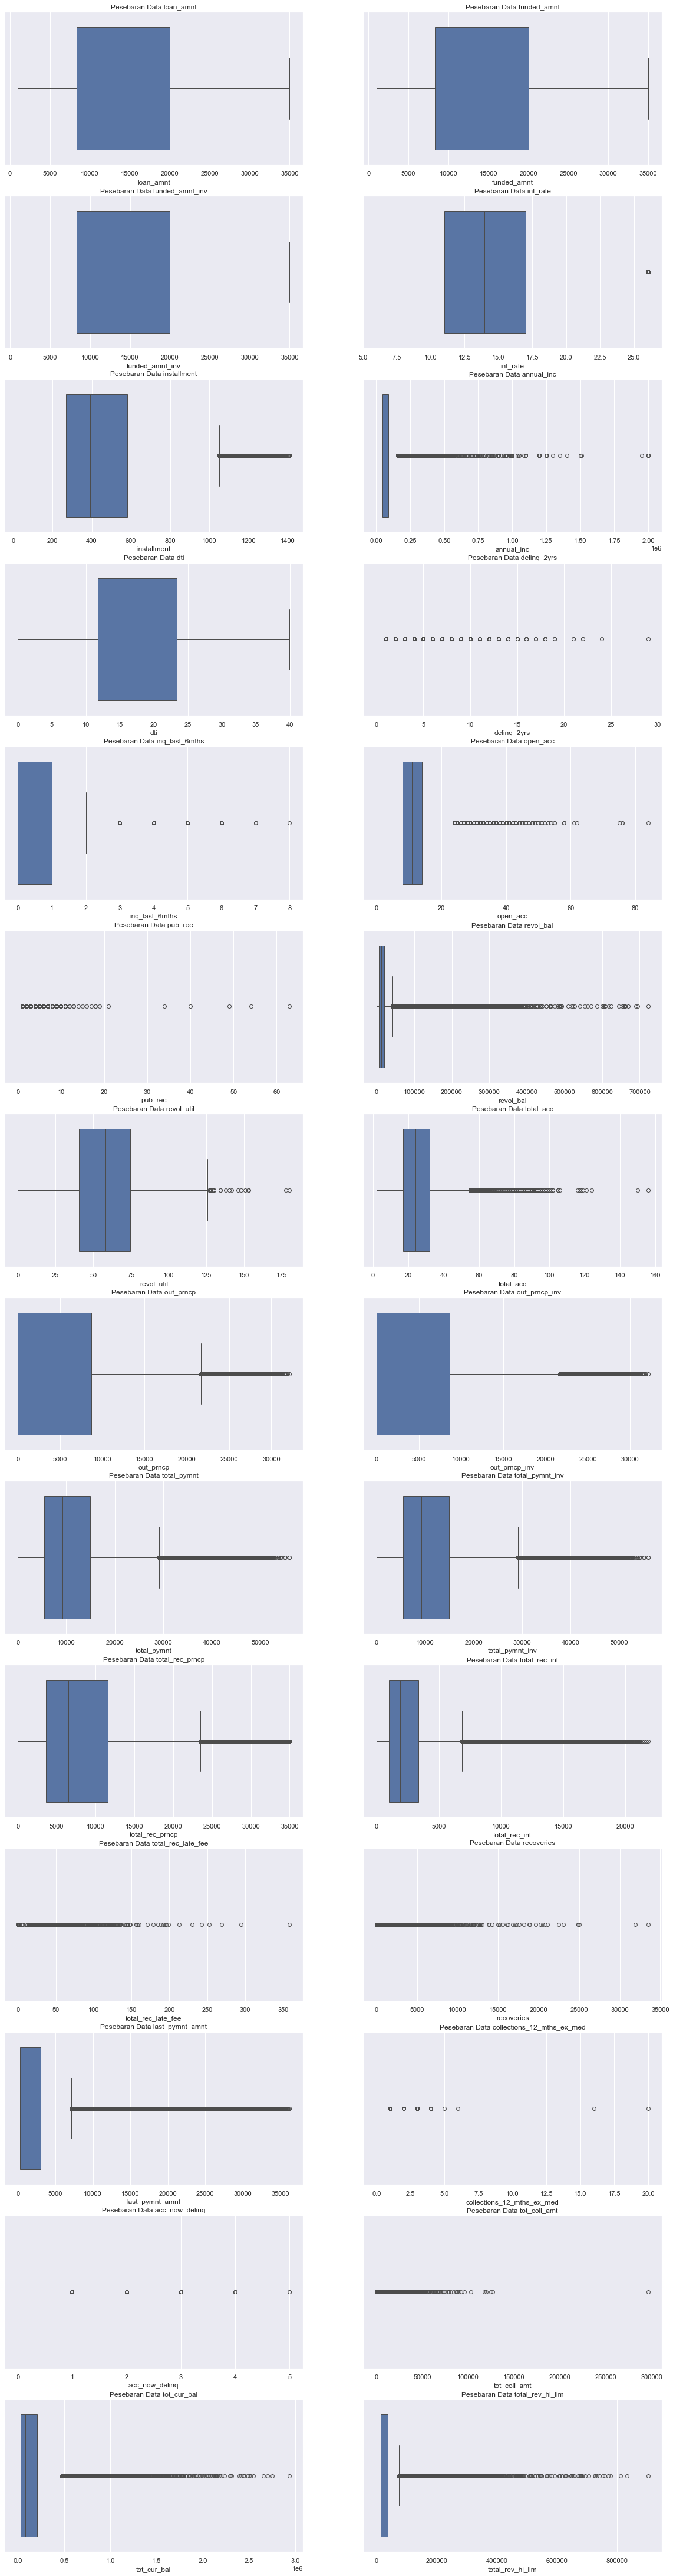

In [43]:
# visualisasikan pesebaran data setiap kolom numerik menggunakan boxplot
plt.figure(figsize=(20, 85))
for i, col in enumerate(list(numerical_cols), 1):
    plt.subplot(15, 2, i)
    sns.boxplot(x=col, data=df_target[numerical_cols])
    plt.title("Pesebaran Data " + col)

Untuk data-data yang berkaitan tentang jumlah pinjaman yang diberikan kepada peminjam, memiliki pesebaran yang cukup normal. Begitu juga terhadap pesebaran data DTI dan suku bunga pinjaman.

Untuk mayoritas data memiliki pola right-skewed. Terutama pada data-data yang berkaitan dengan total saldo kredit yang dimiliki oleh peminjam yang berkorelasi positif dengan pesebaran data pendapatan peminjam.

Selain itu, banyak data yang right-skewed dikarenakan mayoritas data bernilai 0. Hal ini dipengaruhi oleh variabel-variabel penentu suatu pinjaman itu beresiko atau tidak. Contohnya adalah jumlah penagihan yang dilakukan dalam 12 bulan terakhir; dikarenakan mayoritas data (> 90%) adalah pinjaman yang tidak beresiko/GOOD, maka banyak dari pinjaman tersebut yang tidak perlu ditagih.

C:\Users\USER\AppData\Local\Temp/ipykernel_8280/3167289429.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, data=df_target, hue='target', fill=True)


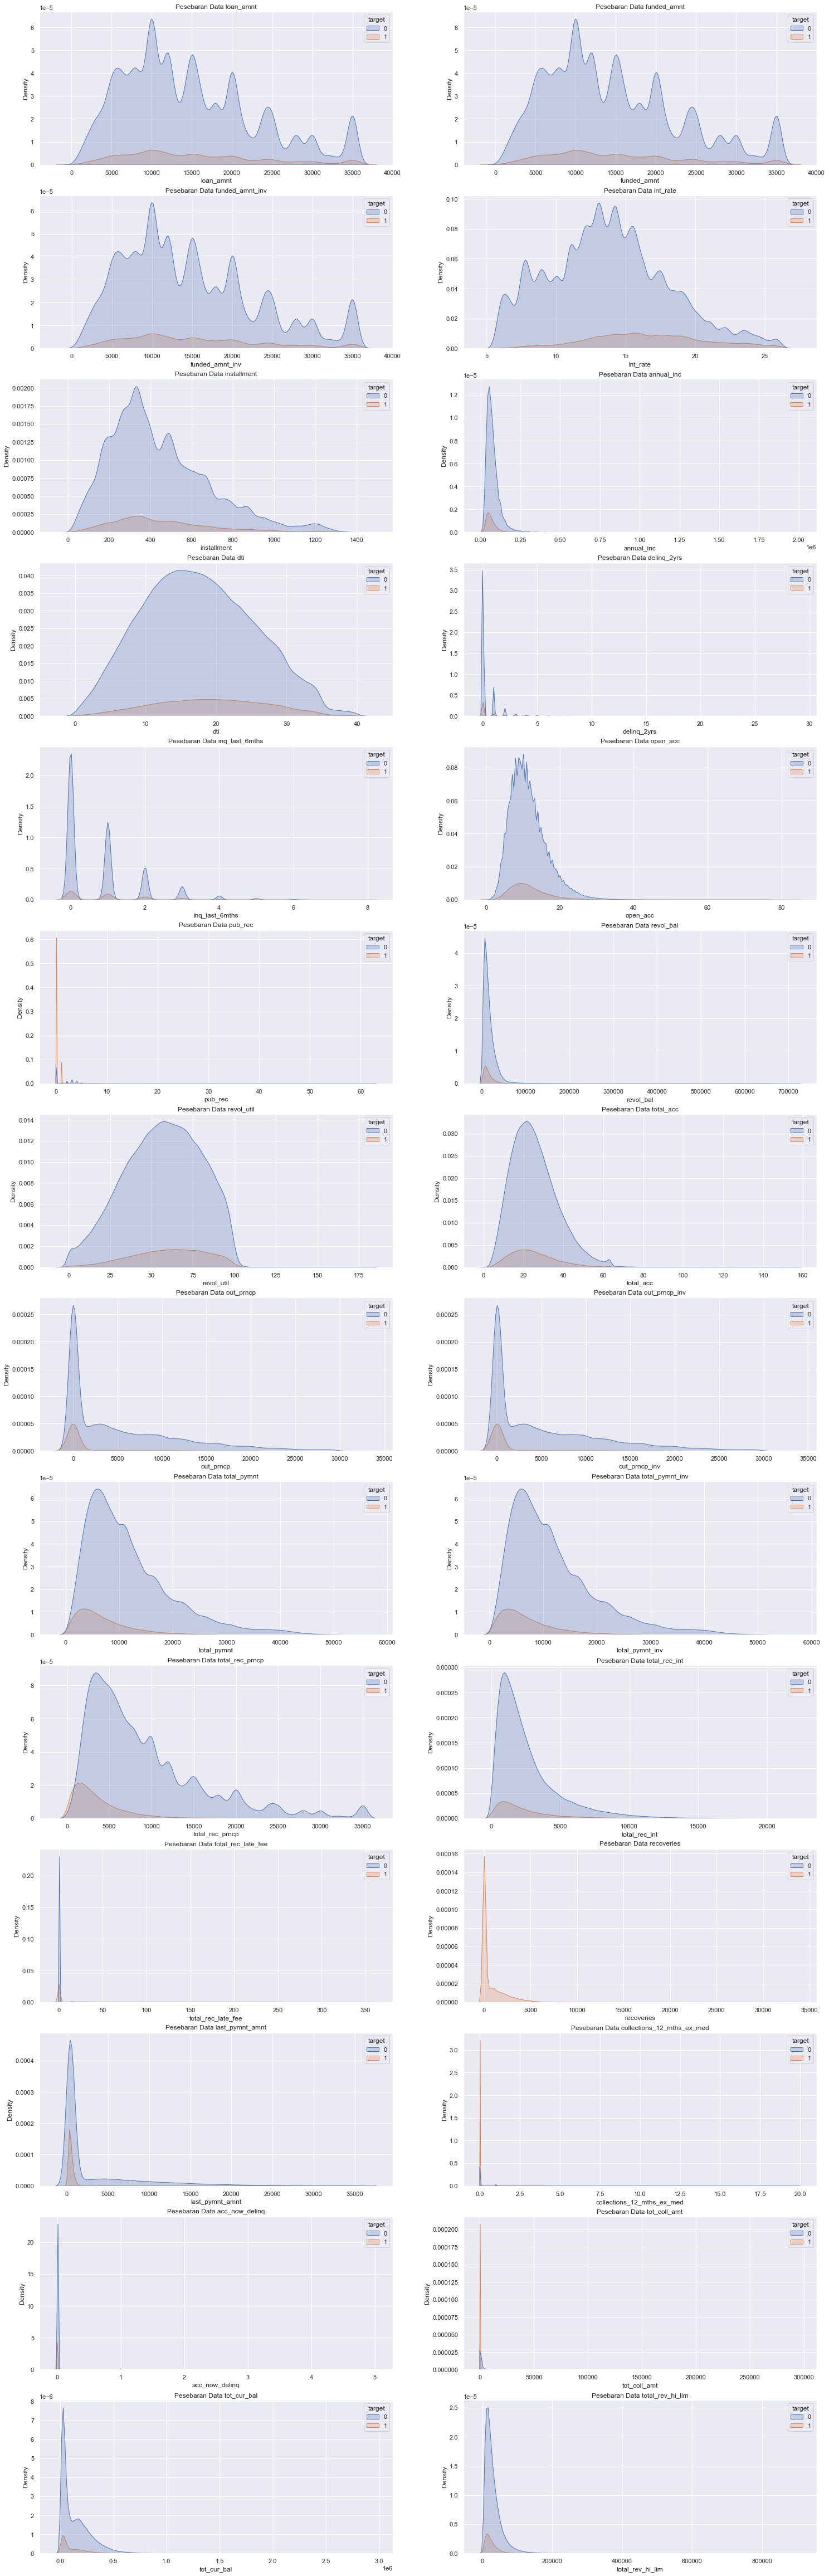

In [44]:
# visualisasikan pesebaran data setiap kolom numerik terhadap TARGET dengan kdeplot
plt.figure(figsize=(25, 90))
for i, col in enumerate(list(numerical_cols), 1):
    plt.subplot(15, 2, i)
    sns.kdeplot(x=col, data=df_target, hue='target', fill=True)
    plt.title("Pesebaran Data " + col)

Hasil visualisasi pesebaran data numerik berdasarkan data TARGET hampir keseluruhan menunjukkan pola yang sama; semakin meningkat pesebaran data pada suatu rentang nilai, maka data TARGET juga akan mengikuti kenaikan tersebut.

Namun, terdapat pola unik pada tingkat suku bunga 5-10% memiliki perbandingan pinjaman beresiko yang cukup rendah, meskipun terjadi penigkatan jumlah pinjaman pada rate bunga di-range tersebut.

## Modelling

### Feature Encoding

In [45]:
data = df_target.copy()

In [46]:
# Hapus kolom loan_status untuk menghindari bias saat pemodelan
data = data.drop(columns=['loan_status'])

In [47]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

# create all of the categories into lists
term_cat = [' 36 months', ' 60 months']
grad_cat = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
subgrade_cat = ['A1', 'A2', 'A3', 'A4', 'A5',
                 'B1', 'B2', 'B3', 'B4', 'B5',
                 'C1', 'C2', 'C3', 'C4', 'C5',
                 'D1', 'D2', 'D3', 'D4', 'D5',
                 'E1', 'E2', 'E3', 'E4', 'E5',
                 'F1', 'F2', 'F3', 'F4', 'F5',
                 'G1', 'G2', 'G3', 'G4', 'G5',]
emp_cat = ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
           '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Instantiate the encoder, all of these lists go in one big categories list:
encoder = OrdinalEncoder(categories=[term_cat, grad_cat, subgrade_cat, emp_cat])

data[['term', 'grade', 'sub_grade', 'emp_length']] = encoder.fit_transform(data[['term', 'grade', 'sub_grade', 'emp_length']])

In [48]:
# label encoding
from sklearn.preprocessing import LabelEncoder

# Fit dan transform kolom-kolom yang hendak di Label Encoding
data['addr_state'] = LabelEncoder().fit_transform(data['addr_state'])

In [49]:
# One Hot Encoding features yang tersisa
data = pd.get_dummies(data, dtype=int)

### Train Test Split

In [50]:
# Define variabel X dan y
X = data.drop(columns=['target'])
y = data['target']

In [51]:
from sklearn.model_selection import train_test_split

# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression menggunakan semua features
# membuat objek LogisticRegression
lreg = LogisticRegression()

# train model LogisticRegression
lreg.fit(X_train, y_train)

# hasil prediksi model
lreg_pred = lreg.predict(X_test)

# Evaluasi model Logistic Regression menggunakan beberapa metrik berbeda
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
print(accuracy_score(y_test, lreg_pred))
print(precision_score(y_test, lreg_pred, average='macro'))
print(recall_score(y_test, lreg_pred, average='macro'))
print(roc_auc_score(y_test, lreg.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, lreg_pred))

0.9750239911106622
0.985131367135856
0.8823528972735983
0.9391498636340304
[[70839    18]
 [ 1960  6379]]


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

# Hasil prediksi
rfclass_pred = classifier_rf.predict(X_test)

# Evaluasi Random Forest
print(accuracy_score(y_test, rfclass_pred))
print(precision_score(y_test, rfclass_pred, average='macro'))
print(recall_score(y_test, rfclass_pred, average='macro'))
print(roc_auc_score(y_test, classifier_rf.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, rfclass_pred))

0.9512349108540835
0.9741565063772266
0.7684374625254826
0.9358295675592445
[[70857     0]
 [ 3862  4477]]


### LightGBM

In [54]:
# rename the columns' name first
import re

X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [55]:
# build the lightgbm model
import lightgbm as lgb

clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

# Hasil prediksi
clf_pred = clf.predict(X_test)

# Evaluasi LightGBM
print(accuracy_score(y_test, clf_pred))
print(precision_score(y_test, clf_pred, average='macro'))
print(recall_score(y_test, clf_pred, average='macro'))
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, clf_pred))

[LightGBM] [Info] Number of positive: 33584, number of negative: 283198
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5590
[LightGBM] [Info] Number of data points in the train set: 316782, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106016 -> initscore=-2.132097
[LightGBM] [Info] Start training from score -2.132097
0.9783701197030154
0.985076320620633
0.8997233699535563
0.9719402931837249
[[70811    46]
 [ 1667  6672]]


### CatBoost

In [56]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(logging_level='Silent')

cbc.fit(X_train, y_train)

cbc_pred = cbc.predict(X_test)

# Evaluasi CatBoost
print(accuracy_score(y_test, cbc_pred))
print(precision_score(y_test, cbc_pred, average='macro'))
print(recall_score(y_test, cbc_pred, average='macro'))
print(roc_auc_score(y_test, cbc.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, cbc_pred))

0.9791024799232284
0.9835304695235221
0.9047880880181798
0.9758788774892653
[[70781    76]
 [ 1579  6760]]


### XGBoost

In [57]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_classifier.fit(X_train, y_train)

xgb_pred = xgb_classifier.predict(X_test)

# Evaluasi XGBoost
print(accuracy_score(y_test, xgb_pred))
print(precision_score(y_test, xgb_pred, average='macro'))
print(recall_score(y_test, xgb_pred, average='macro'))
print(roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, xgb_pred))

0.9787868074145158
0.9827563248242857
0.9037652321820205
0.9746303010586866
[[70772    85]
 [ 1595  6744]]


### CatBoost Hyperparameter Tuning

In [58]:
# set parameter
cb_params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,150,300,200],
          'learning_rate':[0.03,0.001,0.02,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100,25],
          'border_count':[32,5,10,20,50,100,200]}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
cbc_random = RandomizedSearchCV(estimator=cbc, param_distributions=cb_params,
                              n_iter = 100, cv=5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [60]:
# fit random search model
cbc_random.fit(X_train, y_train)

# tampilkan parameter terbaik
cbc_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'learning_rate': 0.3,
 'l2_leaf_reg': 10,
 'iterations': 250,
 'depth': 6,
 'border_count': 200}

In [61]:
# ambil parameter terbaik
cbc_best = cbc_random.best_estimator_

# traing model CatBoostRegressor dengan parameter pilihan menggunakan training sets
cbc_best.fit(X_train, y_train)

# hasil prediksi model new CBR
pred_new = cbc_best.predict(X_test)

# Evaluasi CatBoost
print(accuracy_score(y_test, pred_new))
print(precision_score(y_test, pred_new, average='macro'))
print(recall_score(y_test, pred_new, average='macro'))
print(roc_auc_score(y_test, cbc_best.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, pred_new))

0.9783574928026668
0.9829526336849239
0.901356299106167
0.9735746735701665
[[70779    78]
 [ 1636  6703]]


## ~ END OF FILE ~